<a href="https://colab.research.google.com/github/aaravpanchal/Netflix-TV-Shows-and-Movies-Clustering/blob/main/Netflix_TV_Shows_and_Movies_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix TV Shows and Movies Clustering



##### **Project Type**    - Clustering
##### **Contribution**    - Individual
##### **Submitted by**    - Aarav Panchal


# **Project Summary -**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.


# **GitHub Link -**

https://github.com/aaravpanchal/Netflix-TV-Shows-and-Movies-Clustering

# **Problem Statement**


Exploratory Data Analysis

Understanding what type content is available in different countries

Is Netflix has increasingly focusing on TV rather than movies in recent years.

Clustering similar content by matching text-based features

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from wordcloud import WordCloud,STOPWORDS
from PIL import Image

from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Load the dataset
df=pd.read_csv('/content/drive/MyDrive/Copy of NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print("Total raws are",df.shape[0])
print("Total Columns are" ,len(df.columns))

Total raws are 7787
Total Columns are 12


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

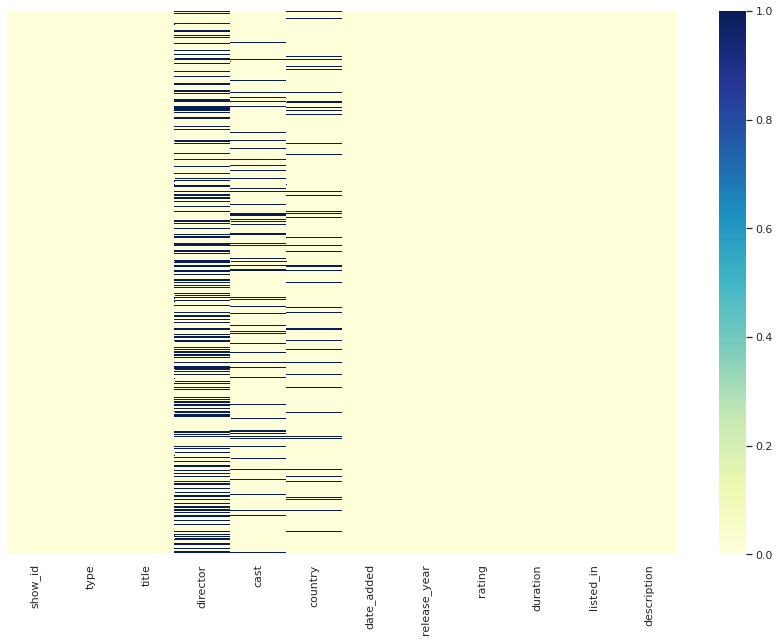

In [ ]:
# Visualizing the missing values
plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='YlGnBu')

### What did you know about your dataset?

Our dataset has around eight thousand rows and twelve columns. Three featurs have missing values in high amount. we have to treat them.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description 

* ***Show_id*** : Unique ID for every Movie / Tv Show

* ***Type*** : Identifier - A Movie or TV Show

* ***Title*** : Title of the Movie / Tv Show

* ***Director***  : Director of the Movie

* ***Cast*** : Actors involved in the movie / show

* ***Country*** : Country where the movie / show was produced

* ***Date_added*** : Date it was added on Netflix

* ***Release_year*** : Actual Releaseyear of the movie / show

* ***Rating*** : TV Rating of the movie / show

* ***Duration*** : Total Duration - in minutes or number of seasons

* ***Listed_in*** : Genere

* ***Description***: The Summary description


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns:
  print("Unique values of",i,"is",df[i].nunique())

Unique values of show_id is 7787
Unique values of type is 2
Unique values of title is 7787
Unique values of director is 4049
Unique values of cast is 6831
Unique values of country is 681
Unique values of date_added is 1565
Unique values of release_year is 73
Unique values of rating is 14
Unique values of duration is 216
Unique values of listed_in is 492
Unique values of description is 7769


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [4]:
#Replacing null values
df.director.fillna('Not Specified',inplace=True)
df.director = df.director.str.split(', ').tolist()
df.cast.fillna('Not Specified',inplace=True)
df.cast = df.cast.str.split(', ').tolist()
df.country.fillna('Other',inplace=True)
df.country = df.country.str.split(', ').tolist()

In [5]:
#keeping only primary values
for i in ['director','cast','country']:
  for j in range(len(df[i])):
    df[i][j]=df[i][j][0]

In [6]:
df['date_added'].fillna(value=df['date_added'].mode()[0],inplace=True)

In [7]:
df["date_added"] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year

In [8]:
df['rating'].fillna(value=df['rating'].mode()[0],inplace=True)

In [9]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
dtype: int64

In [10]:
df['duration']=df['duration'].str.replace('Season','')
df['duration']=df['duration'].str.replace('s','')
df['duration']=df['duration'].str.replace('min','')
df['duration']=df['duration'].astype(str).astype(int)

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,TV Show,3%,Not Specified,João Miguel,Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020
1,s2,Movie,7:19,Jorge Michel Grau,Demián Bichir,Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016
2,s3,Movie,23:59,Gilbert Chan,Tedd Chan,Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018
3,s4,Movie,9,Shane Acker,Elijah Wood,United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017
4,s5,Movie,21,Robert Luketic,Jim Sturgess,United States,2020-01-01,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,2020


### What all manipulations have you done and insights you found?

I have replaced null values of features and did not remove them so we do not loose the useful enformation for EDA. I also extracted the year from date added feature.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Movies vs TV Shows


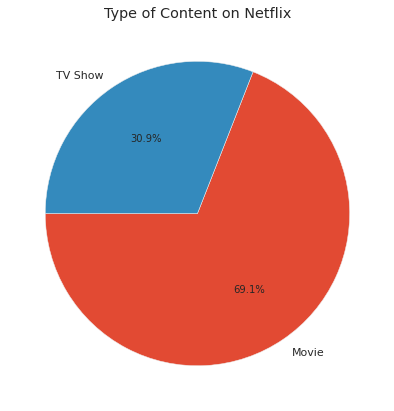

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(13,7))
plt.title("Type of Content on Netflix")
g = plt.pie(df.type.value_counts(), labels=df.type.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

##### 1. Why did you pick the specific chart?

Pie chart descirbes the percentage share of type of content availabe on Netflix.

##### 2. What is/are the insight(s) found from the chart?

Netflix Majorly dealing in Movies and keeping the movies as thier biggest market seller.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Netflix can invest on more TV Shows to increase revenue if TV shows generates more views than movies. This can be decided using modelling.

#### Movies and Tv Shows added on platform per year

In [12]:
years = list(range(2008,2021,1))
#separate movies and tv_shows:
movie_rows = df.loc[df["type"] == "Movie"]
tv_rows = df.loc[df["type"] == "TV Show"]

#Count movies / tv shows per year
movies_counts = movie_rows.year_added.value_counts()
tv_counts = tv_rows.year_added.value_counts()

index_years_mov = movies_counts.index.isin(years)
index_years_tv = tv_counts.index.isin(years)

#select movies / tv shows between chosen years:
movies = movies_counts[index_years_mov].sort_values()
tv_shows = tv_counts[index_years_tv].sort_values()

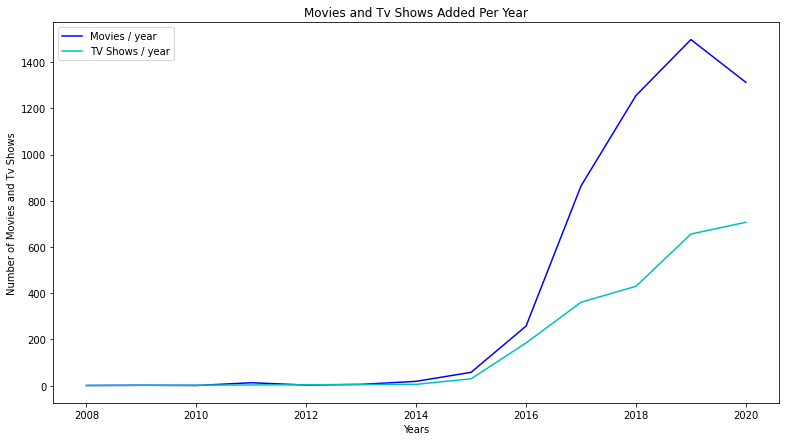

In [13]:

# Set up the matplotlib figure
plt.figure(figsize=(13,7))
sns.lineplot(data=movies, color="b",label="Movies / year")
sns.lineplot(data=tv_shows, color="c",label="TV Shows / year")
plt.title("Movies and Tv Shows Added Per Year")
plt.ylabel("Number of Movies and Tv Shows")
plt.xlabel("Years")
plt.show()

##### 1. Why did you pick the specific chart?

It shows the trend of movies and Tv shows added by netflix.

##### 2. What is/are the insight(s) found from the chart?

Here we can see, the trend took a jump from 2014. Movies started getting added more on platform. Both Movies and Tv Shows followed linear trend till 2019 being the peak year. then movies started getting down.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, Netflix can look up the data and see what are the factors that movies are asking less after 2019. Netflix can either invest on more Tv Shows following the trend.

#### Movies and TV Shows released per year

In [14]:
#define years
years = list(range(2008,2021,1))
#separate movies and tv_shows:
movie_rows = df.loc[df["type"] == "Movie"]
tv_rows = df.loc[df["type"] == "TV Show"]

#Count movies / tv shows per year
movies_counts = movie_rows.release_year.value_counts()
tv_counts = tv_rows.release_year.value_counts()

index_years_mov = movies_counts.index.isin(years)
index_years_tv = tv_counts.index.isin(years)

#select movies / tv shows between chosen years:
movies = movies_counts[index_years_mov].sort_values()
tv_shows = tv_counts[index_years_tv].sort_values()

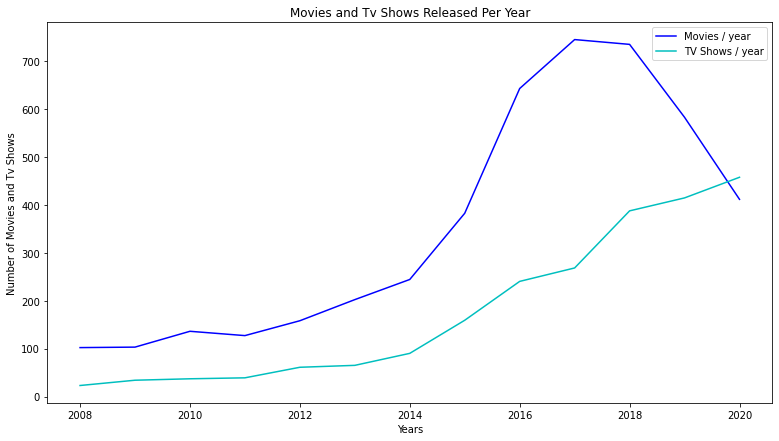

In [15]:
# Set up the matplotlib figure
plt.figure(figsize=(13,7))
sns.lineplot(data=movies, color="b",label="Movies / year")
sns.lineplot(data=tv_shows, color="c",label="TV Shows / year")
plt.title("Movies and Tv Shows Released Per Year")
plt.ylabel("Number of Movies and Tv Shows")
plt.xlabel("Years")
plt.show()


##### 1. Why did you pick the specific chart?

It shows the trend in recent years and distinguish the market demand.

##### 2. What is/are the insight(s) found from the chart?

Movies were always being released more than tv shows since very begining that also in 2017 reaches peak difference. After 2019, Movies started falling down but tv shows kept going in demand. In 2020 same number of movies and tv shows were released.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Netflix can focus more on tv shows to reach market demand. Though, Netflix has been doing the same as we can see the chart of tv shows added per year.

#### Top Producer Countries

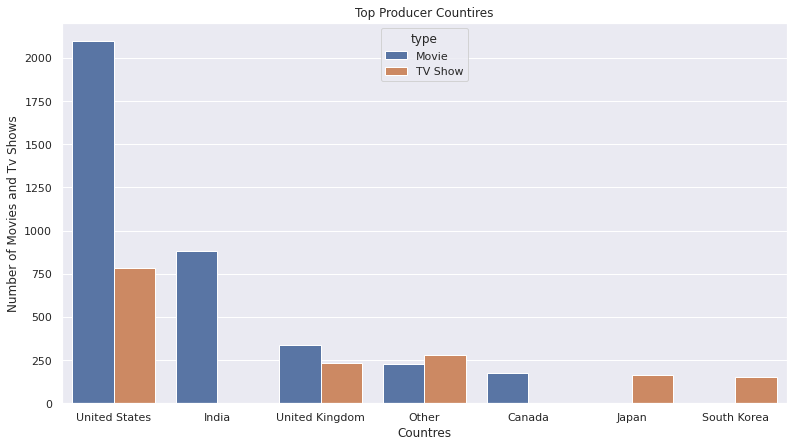

In [ ]:
#Top 5 countries of contents
top5countries= df.groupby(['country','type']).title.count().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(13,7))
sns.barplot(x = 'country', y = 'title',hue='type',ci=None, data = top5countries)
plt.title("Top Producer Countires")
plt.ylabel("Number of Movies and Tv Shows")
plt.xlabel("Countres")
plt.show()

##### 1. Why did you pick the specific chart?

it shows the type of type content different countries have. It depicts the taste of people of different regions.

##### 2. What is/are the insight(s) found from the chart?

United States produces maximum number of movies and tv shows. Netflix has only movies from india which is more than tv shows of us. Japan and South Korea can only watch tv shows on Netflix.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This can help to push to have more tv shows on the platform. Netflix has also started making hindi tv shows to reach maximum number of subscribers.

#### Top 5 Primary Cast

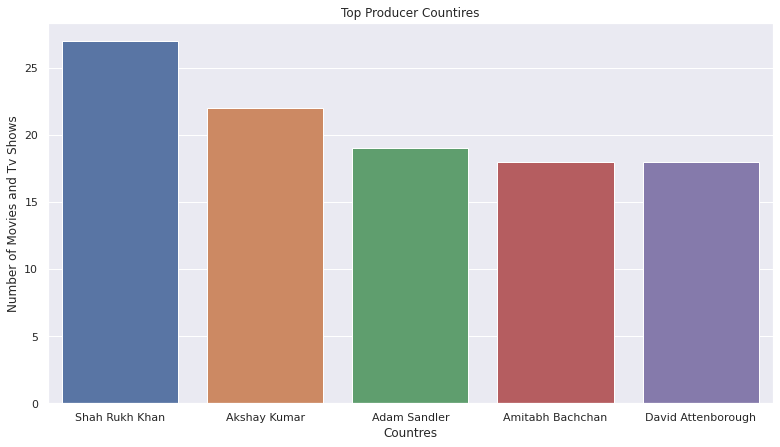

In [ ]:
top5countries= df.cast.value_counts().sort_values(ascending=False).head(6).reset_index().loc[1:]
plt.figure(figsize=(13,7))
sns.barplot(x = 'index', y = 'cast',ci=None, data = top5countries)
plt.title("Top 5 Actors and Actresses")
plt.ylabel("Number of Movies and Tv Shows")
plt.xlabel("Actors/Actresses")
plt.show()

##### 1. Why did you pick the specific chart?

It shows the popularity of cast. Most number of movies or tv shows on platform means more the popularity.

##### 2. What is/are the insight(s) found from the chart?

Shahrukh khan tops the list being the primary actor in around 27 movies and David being at 18. India Tops the list having 3/5 actors in top 5.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This clearly shows the stardom of actors. Netflix can add more movies of these famous actors to gain views.

#### Different Type of Ratings

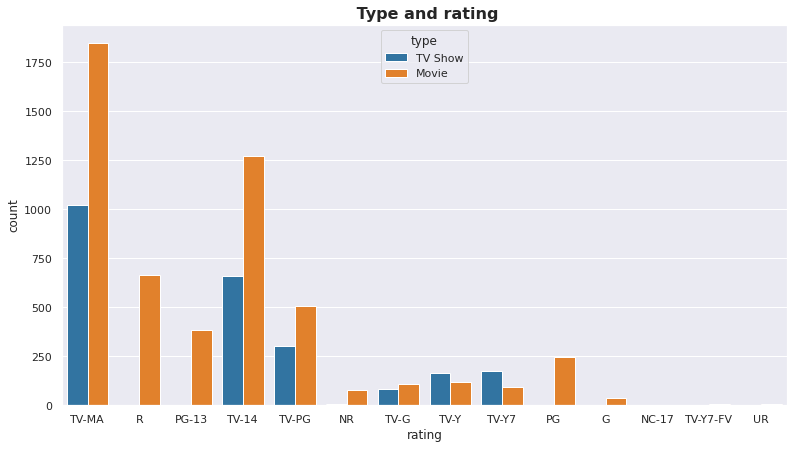

In [ ]:
# Rating
plt.figure(figsize=(13,7))
sns.countplot(x='rating',hue='type',data=df,palette="tab10")
plt.title(' Type and rating',size='16',fontweight="bold")
plt.show()

##### 1. Why did you pick the specific chart?

It shows type of content based on their rated type.

##### 2. What is/are the insight(s) found from the chart?

Most Movies and tv shows are rated TV-MA. This shows most of the audience on netflix is adult followed by teenagers as second top is TV-14. R rated are only shows. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Too much mature content restricts other watchers to watch the content. Netflix has only got more popular among adults. it could have excelled in other age group too.

#### Top 10 Genre

In [76]:
def getgenre(data1):
  list1=[]
  for i in data1.split(','):
    list1.append(i)
  return list1

In [79]:
genre=df['listed_in'].apply(getgenre).reset_index().explode('listed_in')

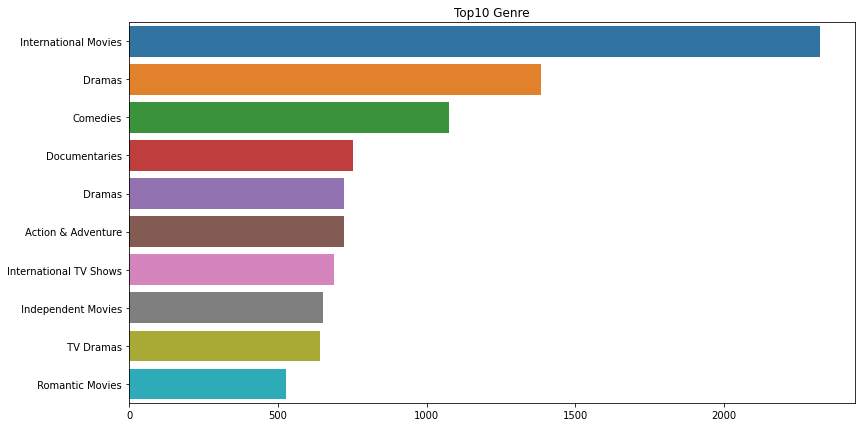

In [83]:
# Top 10 Genre in movies
plt.figure(figsize=(13,7))
sns.barplot(y = genre["listed_in"].value_counts().head(10).index,
            x = genre["listed_in"].value_counts().head(10).values,palette="tab10")
plt.title("Top10 Genre")
plt.show()

##### 1. Why did you pick the specific chart?

Top genres depicts the type content available the most or waht kind of content people love the most.

##### 2. What is/are the insight(s) found from the chart?

One Third of total content on Netflix is of genre International Movies follows by Dramas, comedy and Documetries. Surprisingly Internation Tv shows also made it top 10 genre.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Netflix can start adding some more Internation Tv shows as Tv shows are getting more popular.
Movies trend has been slowing down. Focusing only on Movies may lead to loosing subscribers.

#### Longest Movies

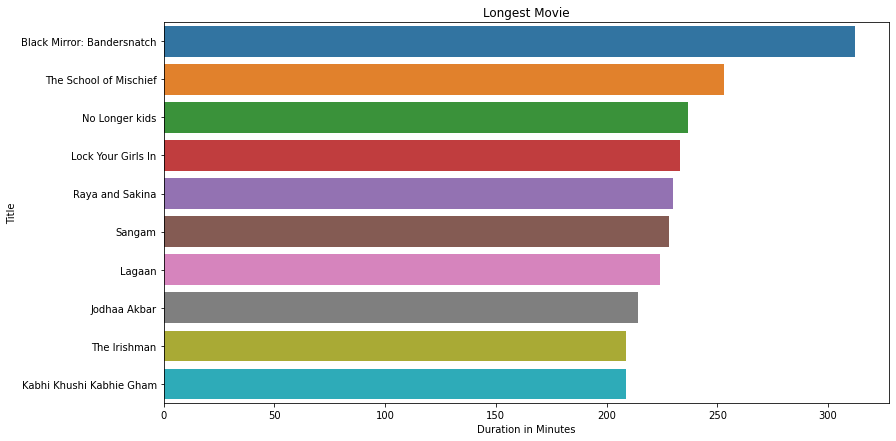

In [84]:
plt.figure(figsize=(13,7))
sns.barplot(data=movie_rows.sort_values(by='duration',ascending=False).head(10), y='title',x='duration',ci=None,palette="tab10") 
plt.title("Longest Movie")
plt.ylabel("Title")
plt.xlabel("Duration in Minutes")
plt.show()


##### 1. Why did you pick the specific chart?

It shows the longest movies on platform. This chart can help in cloud space as per demand.

##### 2. What is/are the insight(s) found from the chart?

We can see black mirror is the longest one with run time of more than 300 minuites and kabhi khushi kabhi gam is minimum in the list with 200 minutes.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This data can help to derive optimal duration of movies that keep the audience watching. Can be done via regression modelling.

#### Chart - 9

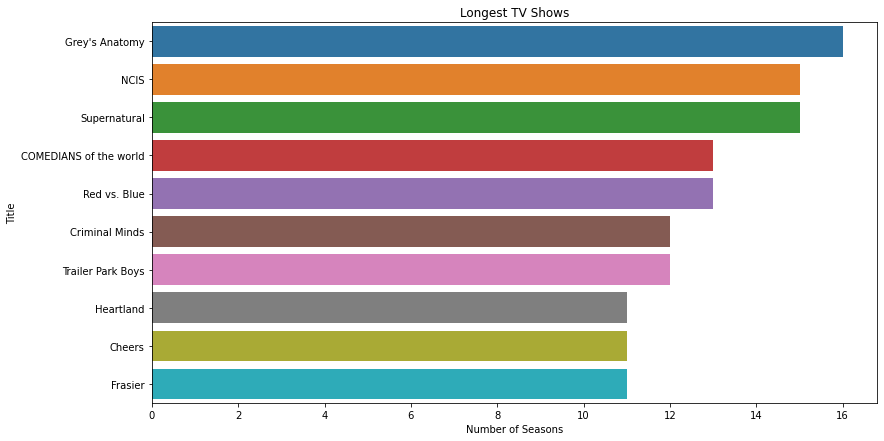

In [85]:
plt.figure(figsize=(13,7))
sns.barplot(data=tv_rows.sort_values(by='duration',ascending=False).head(10), y='title',x='duration',ci=None,palette="tab10") 
plt.title("Longest TV Shows")
plt.ylabel("Title")
plt.xlabel("Number of Seasons")
plt.show()

##### 1. Why did you pick the specific chart?

As stated above, this can help in cloud space management.

##### 2. What is/are the insight(s) found from the chart?

Grey's Anatomy tops the list with 16 seasons and Frasier has minimum number of seasons in the list which is 11.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This insight can help to depict the optimal number of seasons that keeps the audience maximum. this can also be done by regression model.

#### Chart - 14 - Correlation Heatmap

Text(0.5, 1.0, 'Heatmap for Netflix')

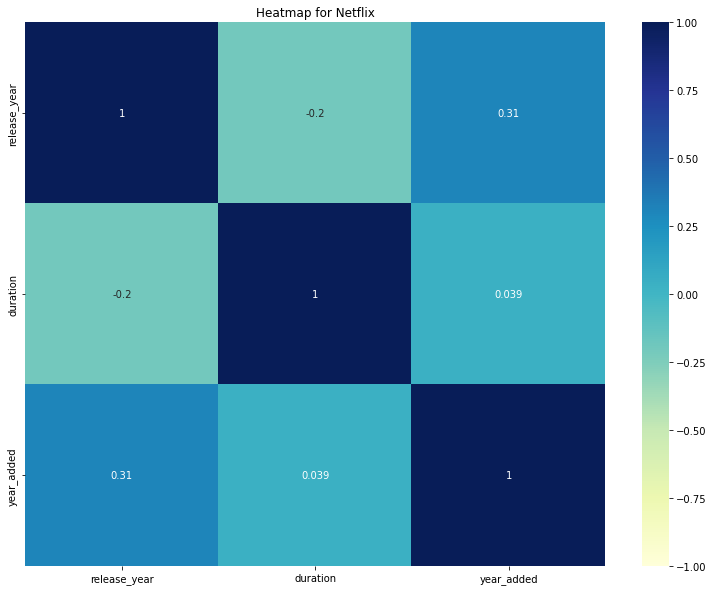

In [88]:
# Correlation Heatmap visualization code
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(method='kendall'), cmap="YlGnBu", annot=True,vmin=-1,vmax=1)
plt.title('Heatmap for Netflix')

##### 1. Why did you pick the specific chart?

This shows the correlation between newmerical factors we have in the data. 

##### 2. What is/are the insight(s) found from the chart?

There is no strong correlation found in the data. still we can se release year and duration are negatively correlated. That means, recent movies and got shorter in duration. which is also true.

#### Chart - 15 - Pair Plot 

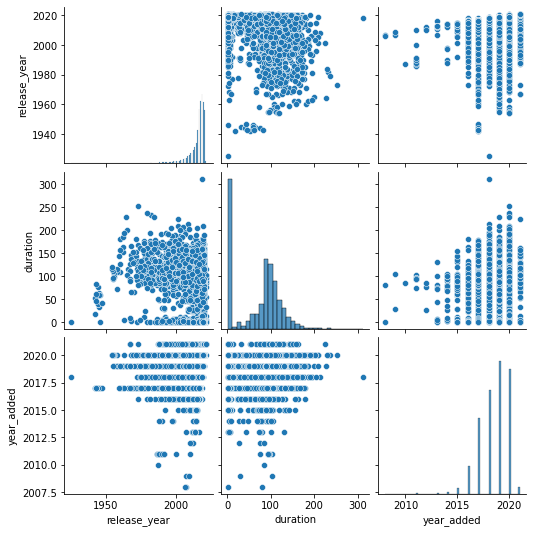

In [92]:
# Pair Plot visualization code
sns.pairplot(df)

##### 1. Why did you pick the specific chart?

We can check the Univariate, Bivariate analysis in the same chart.

##### 2. What is/are the insight(s) found from the chart?

Taking into consideration univariate analysis we can see release year and year added are highly left skewed tha means content has drastically added and released in some recent years.

Bivariate Analysis cocludes that there is no strong relation between these factors.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

#### Our data does not have any missing values now.

### 2. Handling Outliers

##### Not Needed.

### 3. Categorical Encoding

In [93]:
#dropping unnecessory columns
newdf = df.drop(columns=['show_id',"date_added",'title','director','cast','year_added','release_year','listed_in','duration','country'],axis=1)

In [94]:
#Encoding catagorical values.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
newdf["type"] = le.fit_transform(newdf["type"])
newdf['rating'] = le.fit_transform(newdf['rating'])

In [95]:
newdf.head()

,type,rating,description
0,1,8,In a future where the elite inhabit an island ...
1,0,8,After a devastating earthquake hits Mexico Cit...
2,0,5,"When an army recruit is found dead, his fellow..."
3,0,4,"In a postapocalyptic world, rag-doll robots hi..."
4,0,4,A brilliant group of students become card-coun...


#### What all categorical encoding techniques have you used & why did you use those techniques?

I have used Label Encoder from Scikit Learn Library to encode type and rating. I have used this technique to only encode some columns in series.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [96]:
#creating a function for removing punctuation 
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)    

In [97]:
#removing punctuation from discription column
newdf['description'] = newdf['description'].apply(remove_punctuation)
newdf.head(2)

,type,rating,description
0,1,8,In a future where the elite inhabit an island ...
1,0,8,After a devastating earthquake hits Mexico Cit...


In [98]:
#import nltk library for stopwords
import nltk
nltk.download('stopwords')
# extracting the stopwords from nltk library
sw = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [99]:
#function for removing stopwords
def remove_stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    #Method 1
    text1 = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text1)

In [100]:
#removing stopwords from discription
newdf['description'] = newdf['description'].apply(remove_stopwords )
newdf.head(2)

,type,rating,description
0,1,8,future elite inhabit island paradise far crowd...
1,0,8,devastating earthquake hits mexico city trappe...


In [101]:
# Create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(newdf['description'])
# Collect the vocabulary items used in the vectorizer
dictionary = dict(count_vectorizer.vocabulary_.items())

In [102]:
# Store the count in panadas dataframe with vocab as index
wordcount = pd.DataFrame({"Word": dictionary.keys() , "count" :dictionary.values()}).sort_values("count",ascending=False)

In [103]:
wordcount.head()

,Word,count
18869,şeref,19607
10401,ōarai,19606
12385,łukasz,19605
11110,überelite,19604
11681,über,19603


<BarContainer object of 20 artists>

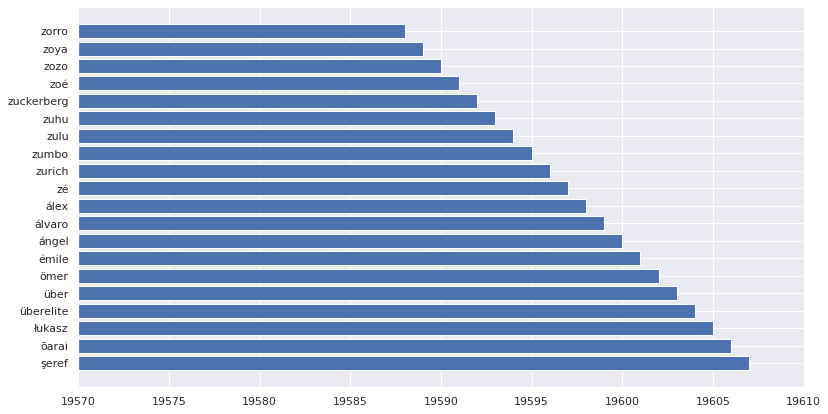

In [ ]:
#Plotting most frquent words
plt.figure( figsize = ( 13,7 ))
plt.xlim(19570, 19610)
plt.barh((wordcount.head(20).Word.values),(wordcount.head(20)['count'].values))

In [104]:
# Create an object of stemming function
stemmer = SnowballStemmer("english")
     
def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 
     
#Stemming for description
newdf['description'] = newdf['description'].apply( stemming )
newdf.head(2)
     

,type,rating,description
0,1,8,futur elit inhabit island paradis far crowd sl...
1,0,8,devast earthquak hit mexico citi trap survivor...


In [105]:
# Create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# Fit the vectorizer using the text data
tfid_vectorizer.fit(newdf['description'])

# Collect the vocabulary items used in the vectorizer
dictionary = dict(tfid_vectorizer.vocabulary_.items())

In [106]:
# Store the count in panadas dataframe with vocab as index
wordcount = pd.DataFrame({"Word": dictionary.keys() , "count" :dictionary.values()}).sort_values("count",ascending=False)

In [ ]:
(wordcount.head(20).Word.values)

array(['şeref', 'ōarai', 'łukasz', 'überelit', 'über', 'ömer', 'émile',
       'ángel', 'álvaro', 'álex', 'zé', 'zurich', 'zumbo', 'zulu', 'zuhu',
       'zuckerberg', 'zoé', 'zozo', 'zoya', 'zorro'], dtype=object)

In [ ]:
(wordcount.head(20)['count'].values)

array([14252, 14251, 14250, 14249, 14248, 14247, 14246, 14245, 14244,
       14243, 14242, 14241, 14240, 14239, 14238, 14237, 14236, 14235,
       14234, 14233])

<BarContainer object of 20 artists>

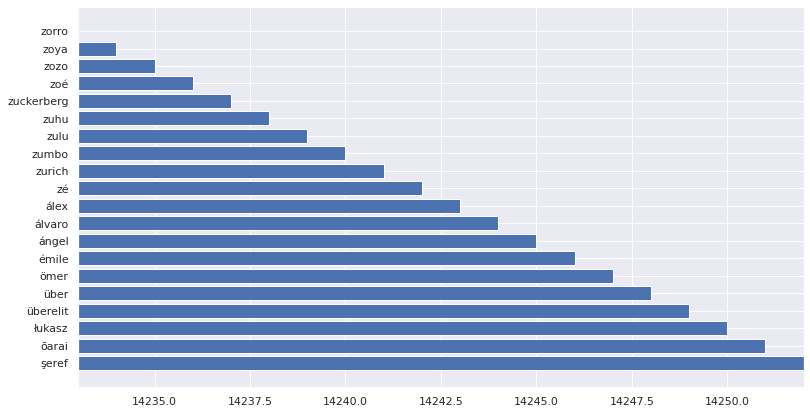

In [ ]:
#lets plot frequent words again.
plt.figure( figsize = ( 13,7 ))
plt.xlim(14233, 14252)
plt.barh((wordcount.head(20).Word.values),(wordcount.head(20)['count'].values))

In [107]:

#creating new column name length
newdf['descriptionlength'] = newdf['description'].apply(lambda x: len(x))
newdf.head()

,type,rating,description,descriptionlength
0,1,8,futur elit inhabit island paradis far crowd sl...,82
1,0,8,devast earthquak hit mexico citi trap survivor...,88
2,0,5,armi recruit found dead fellow soldier forc co...,102
3,0,4,postapocalypt world ragdol robot hide fear dan...,89
4,0,4,brilliant group student becom cardcount expert...,99


## ***7. ML Model Implementation***

### Sillhoute Analysis

In [ ]:
#Getting features
x_features = newdf[['type','rating','descriptionlength']]
x_features.head()

,type,rating,descriptionlength
0,1,8,82
1,0,8,88
2,0,5,102
3,0,4,89
4,0,4,99


In [ ]:
#scaling x features
stdscaler = preprocessing.StandardScaler()
x=stdscaler.fit_transform(x_features)

In [ ]:

#store silhouette score corresponding no. of clusters
no_cluster_silhouette_score = {}
     

For n_clusters = 2 The average silhouette_score is : 0.4176097990982944
For n_clusters = 3 The average silhouette_score is : 0.3991506024976914
For n_clusters = 4 The average silhouette_score is : 0.38326044921010227
For n_clusters = 5 The average silhouette_score is : 0.3635568621266572
For n_clusters = 6 The average silhouette_score is : 0.356728503528789
For n_clusters = 7 The average silhouette_score is : 0.3584925324484504
For n_clusters = 8 The average silhouette_score is : 0.3691445497102827
For n_clusters = 9 The average silhouette_score is : 0.37435556644274354
For n_clusters = 10 The average silhouette_score is : 0.38035440594147313
For n_clusters = 11 The average silhouette_score is : 0.3745622200103998
For n_clusters = 12 The average silhouette_score is : 0.37070078591618294
For n_clusters = 13 The average silhouette_score is : 0.37331739314095597
For n_clusters = 14 The average silhouette_score is : 0.3849045978940014
For n_clusters = 15 The average silhouette_score is : 0

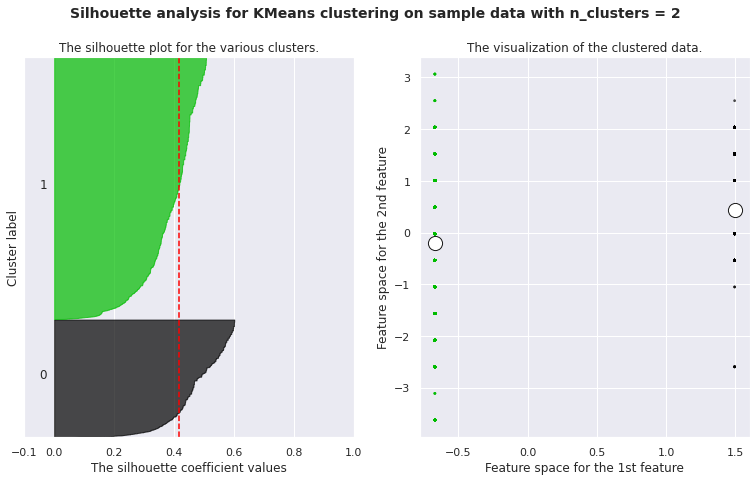

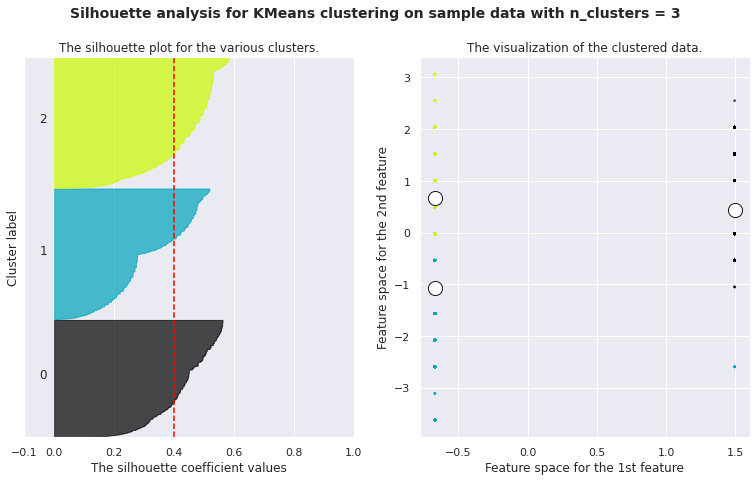

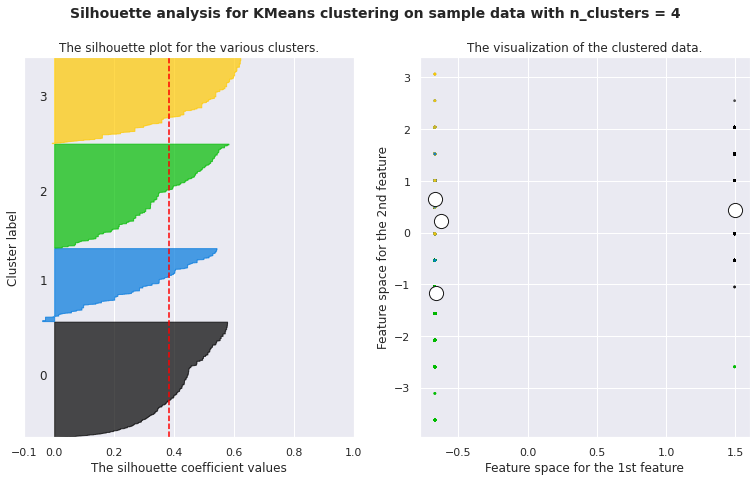

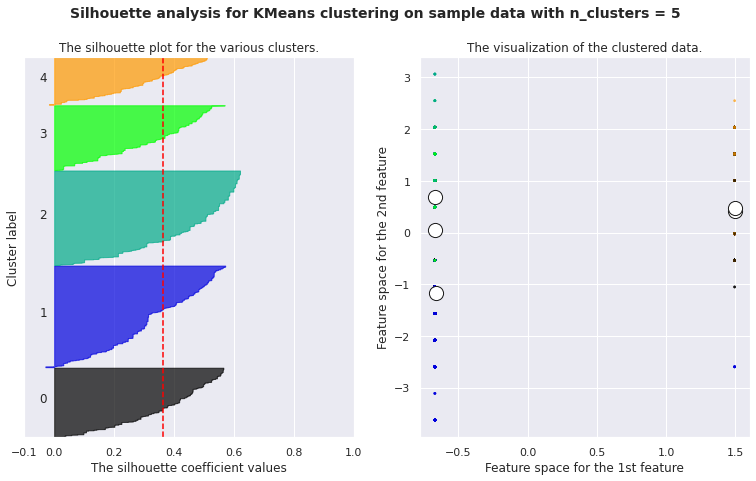

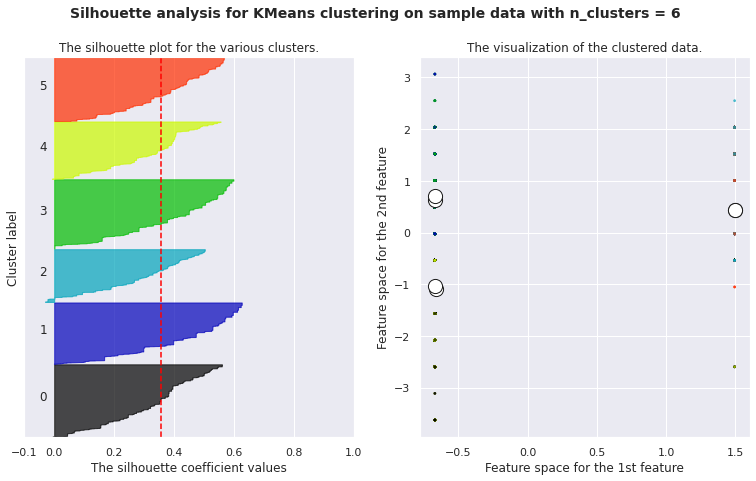

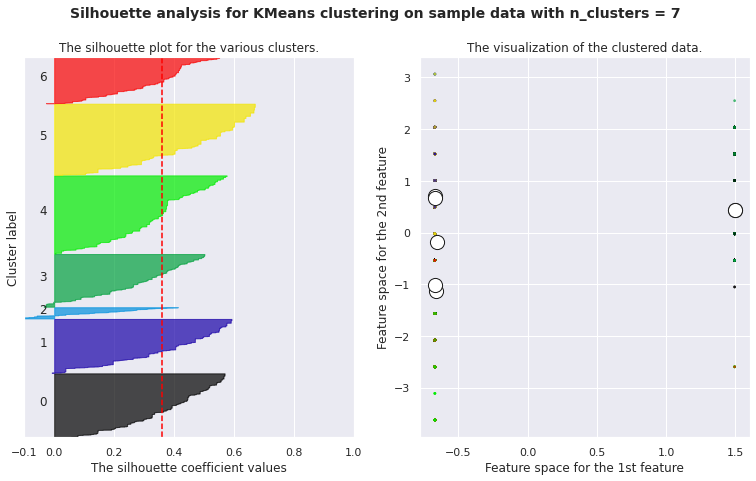

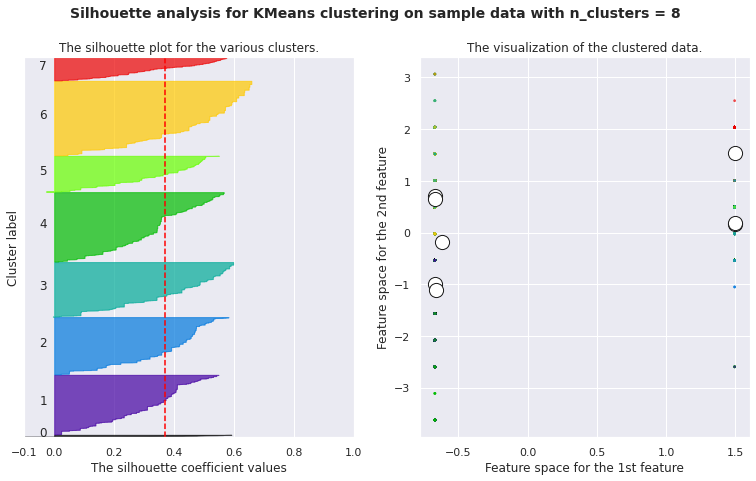

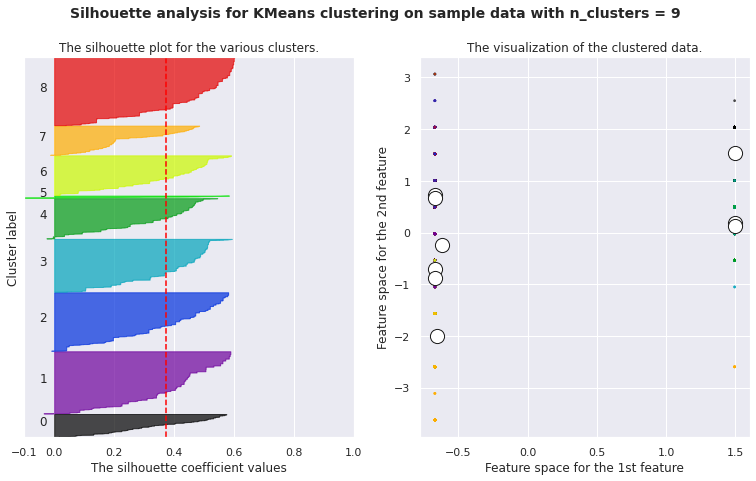

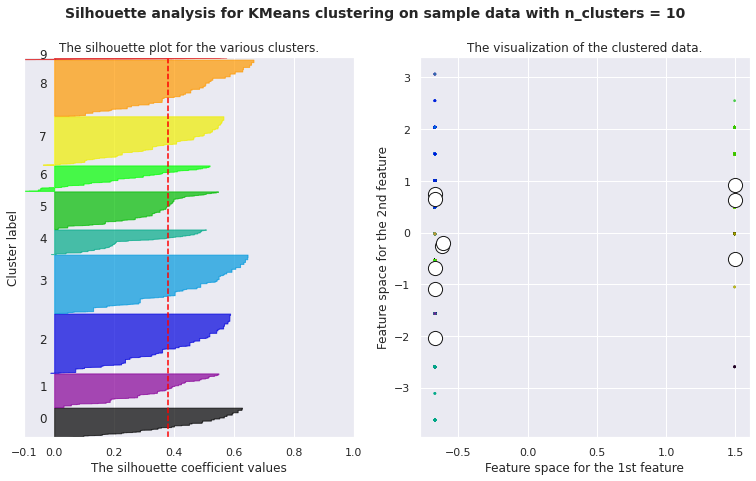

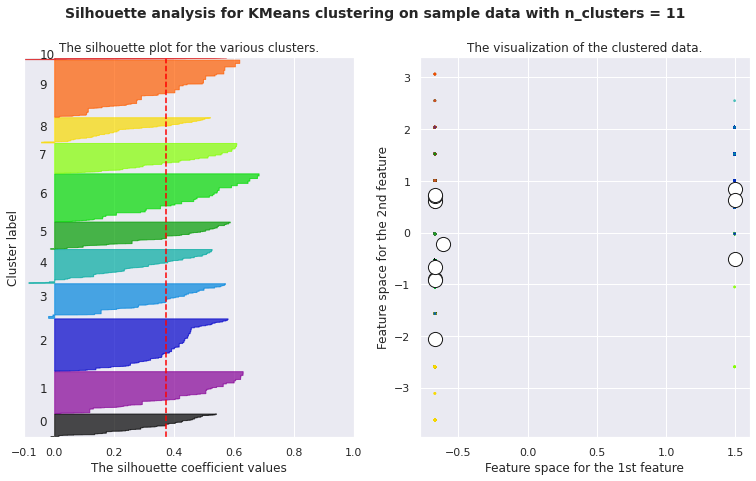

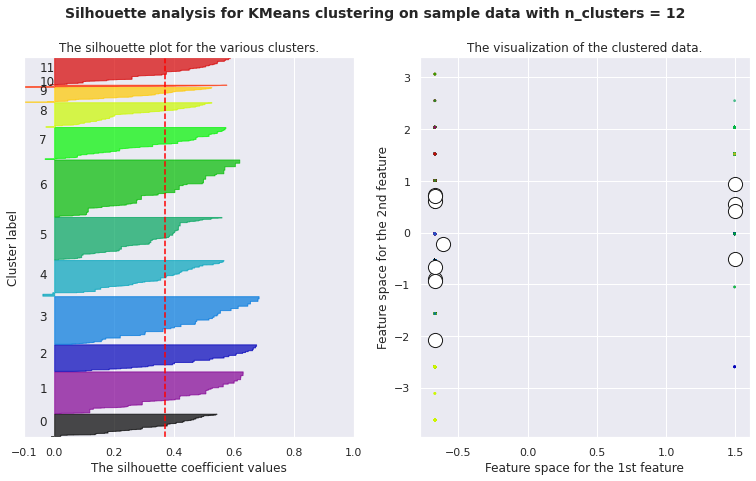

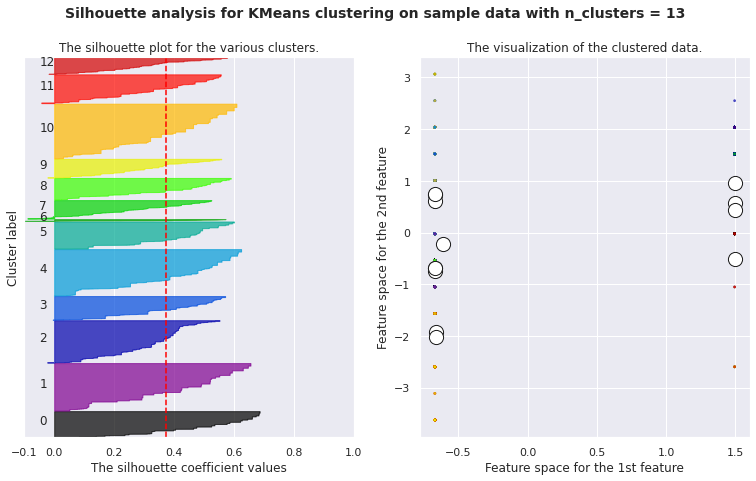

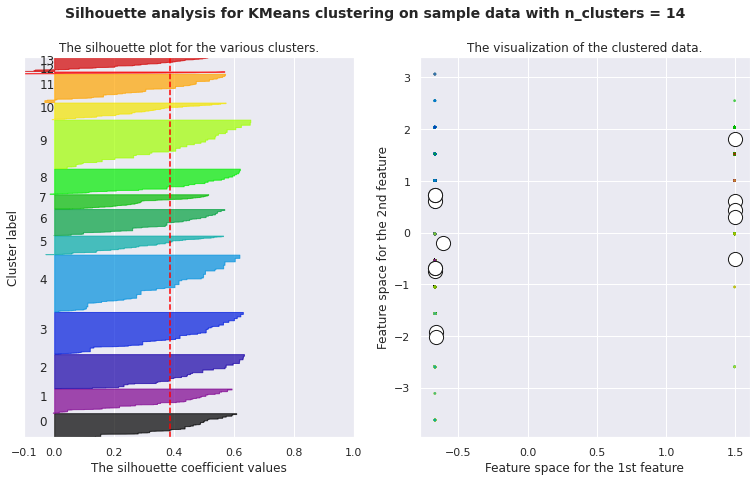

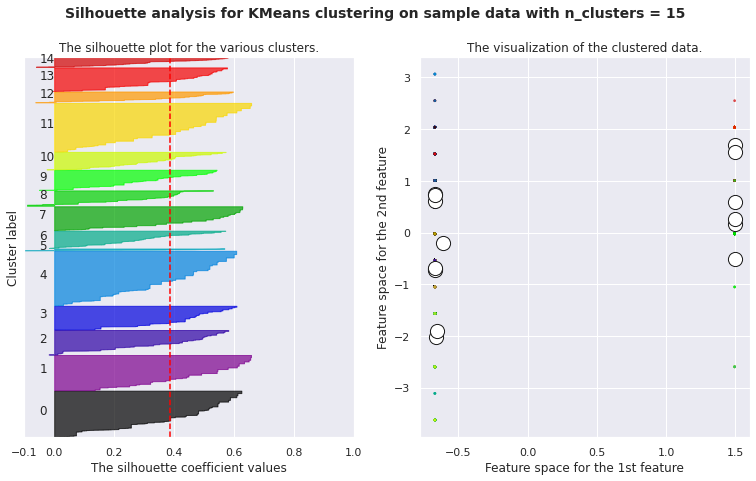

In [ ]:
#range_n_clusters = [2, 3, 4, 5, 6]
range_n_clusters = list(range(2,16))

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(13, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    no_cluster_silhouette_score[n_clusters] = round(silhouette_avg,3)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(x[:, 0], x[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
     # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker=''.format(i), alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [ ]:
from prettytable import PrettyTable
columns = ['n_clusters','silhouette_score']                                #column_names 
myTable = PrettyTable()                                                    #creating object
myTable.add_column(columns[0],list(no_cluster_silhouette_score.keys()))    #n_clusters
myTable.add_column(columns[1],list(no_cluster_silhouette_score.values()))  #silhouette score
print(myTable)

+------------+------------------+
| n_clusters | silhouette_score |
+------------+------------------+
|     2      |      0.418       |
|     3      |      0.399       |
|     4      |      0.383       |
|     5      |      0.364       |
|     6      |      0.357       |
|     7      |      0.358       |
|     8      |      0.369       |
|     9      |      0.374       |
|     10     |       0.38       |
|     11     |      0.375       |
|     12     |      0.371       |
|     13     |      0.373       |
|     14     |      0.385       |
|     15     |      0.385       |
+------------+------------------+


### KMeans Clustering

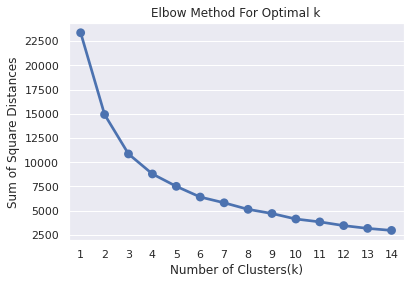

In [ ]:
#Elbow Method For Optimal k
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(x)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

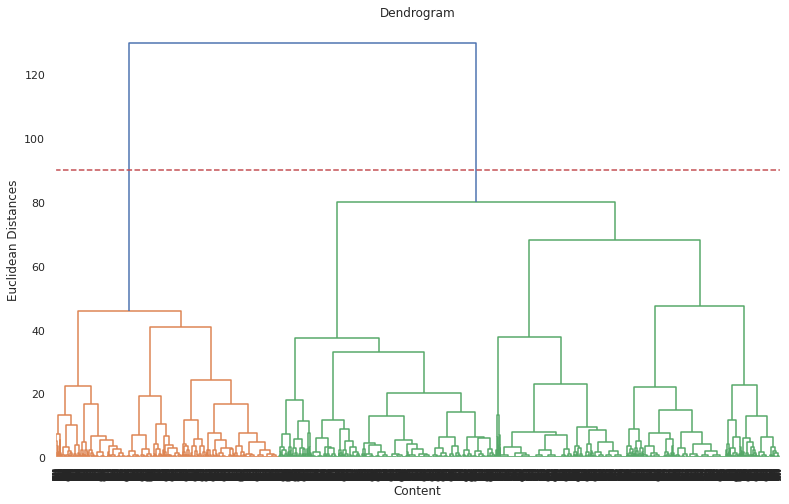

In [ ]:
# Let's import sch
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Content')
plt.ylabel('Euclidean Distances')
plt.axhline(y=90,color='r', linestyle='--')
plt.show()                                # find largest vertical distance we can make without crossing any other horizontal line
     

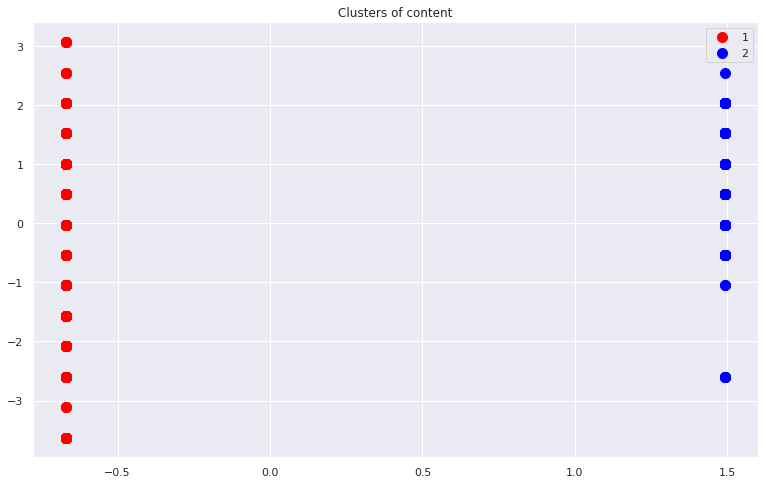

In [ ]:
# Let's  import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)
     

# Visualizing the clusters (three dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'red', label = '1')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'blue', label = '2')

plt.title('Clusters of content')

plt.legend()
plt.show()
     

# **Conclusion**

The Data has been clustered in two segments.

Sillhoute score is found to maximum for 2 clusters.

Elbow method also tells us the optimual clusters are two.

Dendogram has also depicts that clusters should be two.

Aglomerrative Clustering also predicted it to be two.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***